<div style="text-align: center;">
    <h1> <strong>Cohort of Songs
</div>

### **Problem Statement**

Design a system that categorizes songs into distinct groups based on their **audio features** (e.g., tempo, rhythm, key, mood, energy, etc.). Leverage these groupings to create a **recommendation engine** that suggests songs tailored to user preferences or behaviors. The goal is to enhance user engagement and satisfaction by providing personalized music recommendations based on song similarity and user interests.

### **Data Description**

| Variable        | Description                                                                                                                                                                                                 |
|-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| name            | It is the name of the song.                                                                                                                                                                                 |
| album           | It is the name of the album.                                                                                                                                                                                |
| release_date    | It is the day, month, and year the album was released.                                                                                                                                                      |
| track number    | It is the order in which the song appears on the album.                                                                                                                                                     |
| id              | It is the Spotify ID for the song.                                                                                                                                                                          |
| uri             | It is the Spotify URI for the song.                                                                                                                                                                         |
| acousticness    | A confidence measure from 0.0 to 1.0 indicates whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.                                                                    |
| danceability    | It describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable, and 1.0 is the most danceable. |
| energy          | It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness| It predicts whether a track contains no vocals. 'Ooh' and 'aah' sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly 'vocal.' The closer the instrumentalness value is to 1.0, the greater the likelihood that the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness        | It detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. |
| loudness        | The overall loudness of a track in decibels (dB) and loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB. |
| speechiness     | It detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| tempo           | The overall estimated tempo of a track is measured in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| valence         | A measure from 0.0 to 1.0 describes the musical positivity conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). |
| popularity      | The popularity of the song ranges from 0 to 100.                                                                                                                                                             |
| duration_ms     | It is the duration of the track in milliseconds.                                                                                                                                                            |


### **Implementation Plan**
*1. Preliminary Data Examination and Rectification.  
2. Exploratory Insights and Recommendations in Music Analytics.  
3. Clustering and Feature-Based Segmentation in Music Data.*

<div style="border: 2px solid #2196F3; padding: 10px; border-radius: 5px; background-color: #E3F2FD;">
    <strong>Note:</strong> Let's begin by importing all the necessary dependencies to set up our environment and ensure smooth execution.
</div>

### **Setting Up: Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from IPython.display import display,HTML

### **Loading and Exploring the Dataset**

In [2]:
dataset = pd.read_csv('data/rolling_stones_spotify.csv')

### **Initial Dataset Exploration**

In [3]:
dataset.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

>*Dataset Statistics: `dataset.describe()` – to get a statistical summary of numerical columns.*

In [4]:
dataset.shape

(1610, 18)

>*Dataset Shape: `dataset.shape` – to get the number of rows and columns.*

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


>*Dataset Information: `dataset.info()` – to understand data types, null values, and memory usage.*

### **Previewing the Dataset**

In [6]:
dataset.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

### **Check for missing values**

In [7]:
missing_values = dataset.isnull().sum().reset_index()
missing_values.columns = ['Column Name', 'Missing Values']

html_table = missing_values.to_html(index=False)
display(HTML(html_table))

### **Finding Frequency of Songs & Albums**

In [8]:
for col in ['name','album']:
    print(f"\nValue counts for {col}:")
    print(dataset[col].value_counts())


Value counts for name:
name
Brown Sugar - Live                        16
Honky Tonk Women - Live                   16
Tumbling Dice - Live                      14
Sympathy For The Devil - Live             13
Start Me Up - Live                        12
                                          ..
Low Down - Remastered                      1
Already Over Me - Remastered               1
Gunface - Remastered                       1
You Don't Have To Mean It - Remastered     1
Tell Me - Full Version / Mono Version      1
Name: count, Length: 954, dtype: int64

Value counts for album:
album
Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Live Licks                                                   46
Tattoo You (Super Deluxe)                                    46
Some Girls (Deluxe Version)                                  44
                                                             ..
Beggars Banquet (50th 

### **Handle Duplicates**

In [9]:
# Find duplicate rows
duplicates_ = dataset[dataset.duplicated()]
# Remove duplicates
dataset = dataset.drop_duplicates()

>*Using `dataset.duplicated()` to identify duplicate entries.*  
>*Dropping duplicates using `dataset.drop_duplicates()`.*

### **Outlier Detection**

In [10]:
numeric_cols = list(dataset.select_dtypes(include=np.number).columns)
#exclude unnecessary columns from the outlier detection
exclude = ['Unnamed: 0', 'track_number', 'tempo', 'loudness', 'popularity', 'duration_ms']
numeric_cols = [column for column in numeric_cols if column not in exclude]

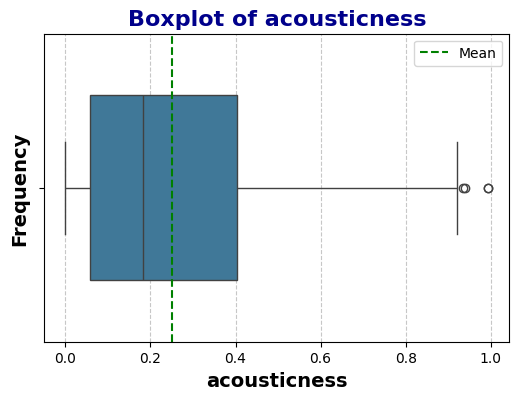

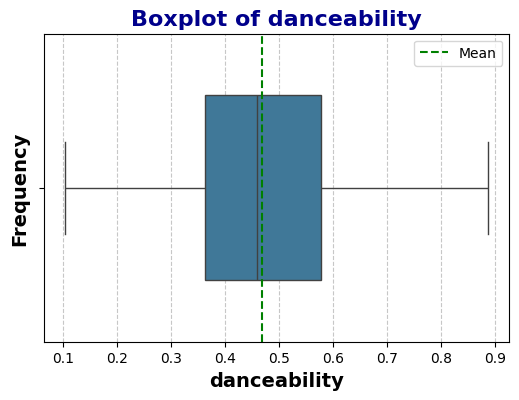

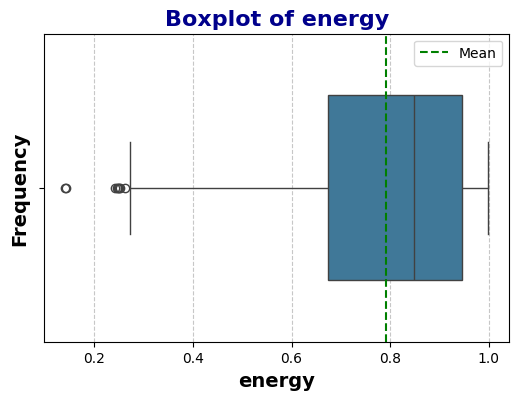

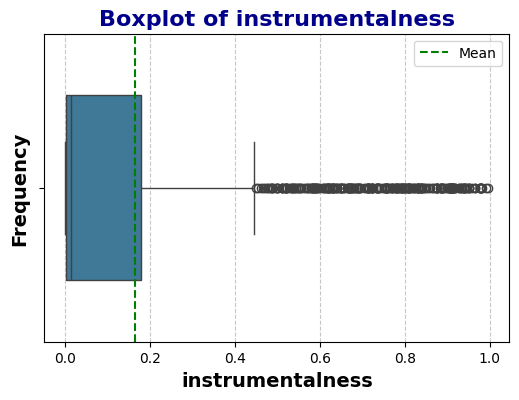

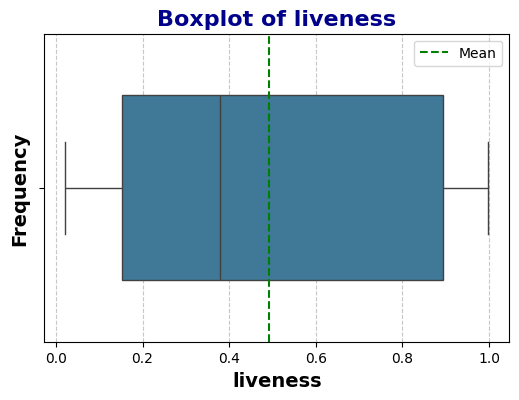

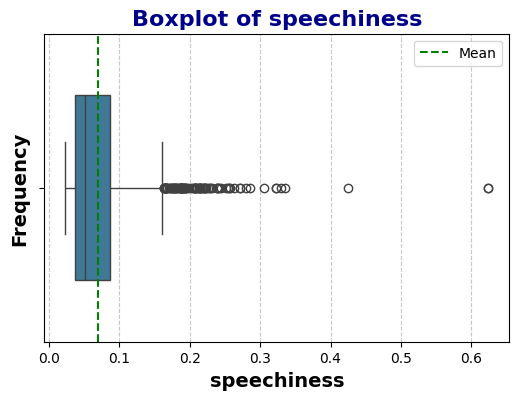

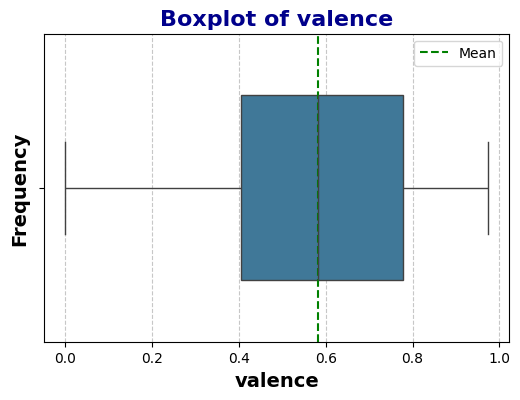

In [11]:
# Boxplot Visualization
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    
    # Using a vibrant color palette
    color = sns.color_palette("mako", as_cmap=True)(0.5)
    
    # Drawing the boxplot
    sns.boxplot(
        x=dataset[col],
        color=color,
        width=0.6,  # Adjusting box width
        saturation=0.8  # Making colors slightly transparent
    )
    
    # Adding a horizontal line for the mean
    plt.axvline(x=dataset[col].mean(), color='green', linestyle='--', label='Mean')
    
    # Adding title and labels with dynamic font sizes
    plt.title(f"Boxplot of {col}", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=14, fontweight='bold')
    plt.ylabel("Frequency", fontsize=14, fontweight='bold')

    # Adding grid for better visual clarity
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Adding legend for mean
    plt.legend()

    # Display the plot
    plt.show()

>*A boxplot visually represents the distribution of a dataset, showing its median, quartiles, spread, and potential outliers for quick insights.*

### **Refine Dataset**

In [12]:
#I'm going to delete unnecessary columns and create a new dataframe.
dataset.drop(['Unnamed: 0','id','uri'],axis=1,inplace=True)

### **Analyzing the Distribution of Popularity Scores**

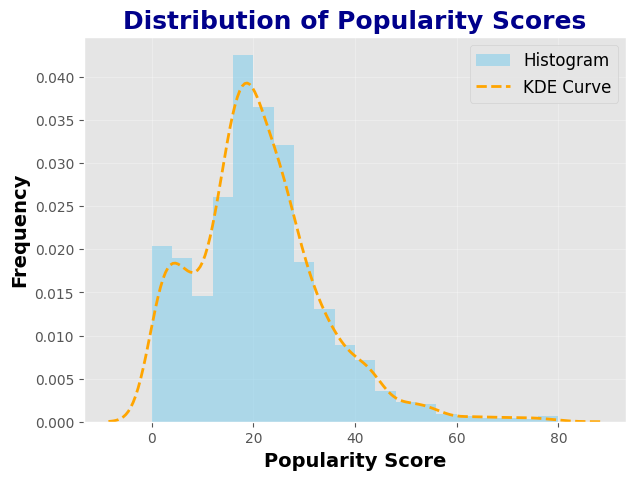

In [13]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(7, 5))
    plt.hist(dataset['popularity'], bins=20, density=True, alpha=0.6, color='skyblue', label='Histogram')
    sns.kdeplot(dataset['popularity'], color='orange', linewidth=2, linestyle='--', label='KDE Curve')
    plt.title("Distribution of Popularity Scores", fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel("Popularity Score", fontsize=14, fontweight='bold', color='black')
    plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='black')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

>*From Popularity Scores we can see that only few songs have **score** more than **40**.*

### **Setting a Threshold for Popularity Scores to Identify Top Songs**

In [14]:
popularity_thres = 40

popular_songs = dataset[dataset['popularity'] >= popularity_thres]

popular_albums = popular_songs.groupby('album').size().reset_index(name="Popular Songs")

top_2_albums = popular_albums.sort_values(by="Popular Songs",ascending=False).head(2)

# Sorting albums by the number of popular songs for better visualization
popular_albums_sorted = popular_albums.sort_values(by="Popular Songs")

top_2_albums = popular_albums_sorted.tail(2)
colors = ['plum' if album in top_2_albums.values else 'skyblue' for album in popular_albums_sorted['album']]

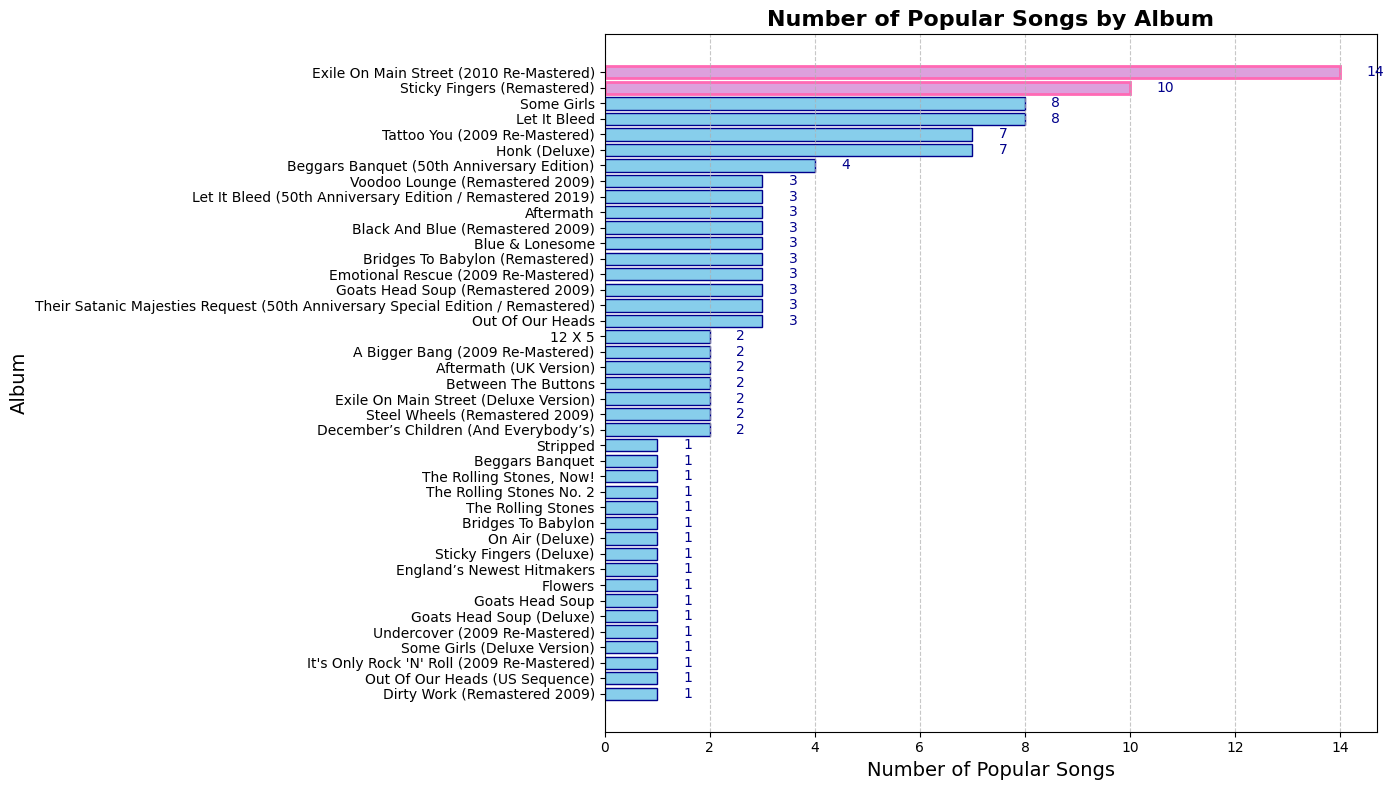

In [15]:
# Creating the horizontal bar chart with sorted data in ascending order
plt.figure(figsize=(14, 8))
bars = plt.barh(popular_albums_sorted['album'], popular_albums_sorted['Popular Songs'], color=colors, edgecolor='darkblue')

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center', fontsize=10, color='darkblue')

# Add title and axis labels
plt.xlabel('Number of Popular Songs', fontsize=14)
plt.ylabel('Album', fontsize=14)
plt.title('Number of Popular Songs by Album', fontsize=16, fontweight='bold')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight top 2 albums
for bar, album in zip(bars, popular_albums_sorted['album']):
    if album in top_2_albums['album'].values:
        bar.set_edgecolor('hotpink')
        bar.set_linewidth(2)

plt.tight_layout()
plt.show()

### **Assessment of numerical Data Distributions**

In [16]:
numerical_features = dataset.select_dtypes(include=np.number)
numerical_features = numerical_features.drop('track_number',axis=1)

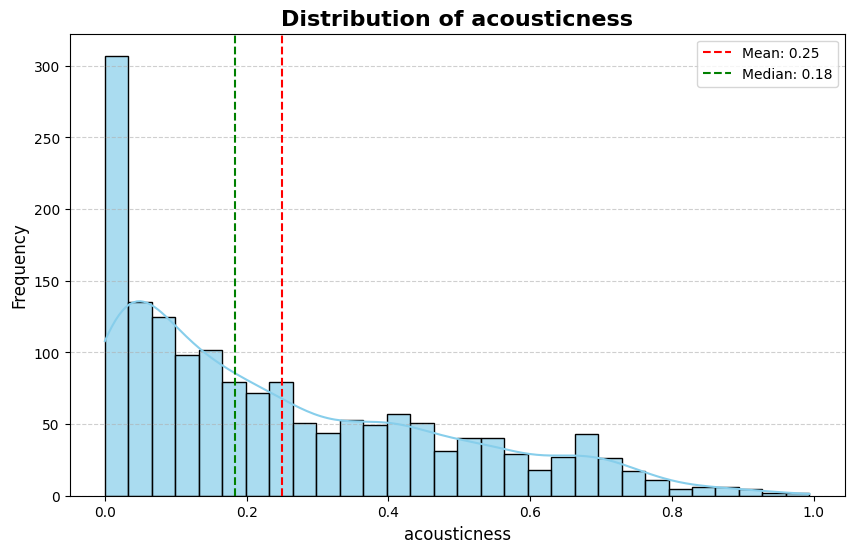

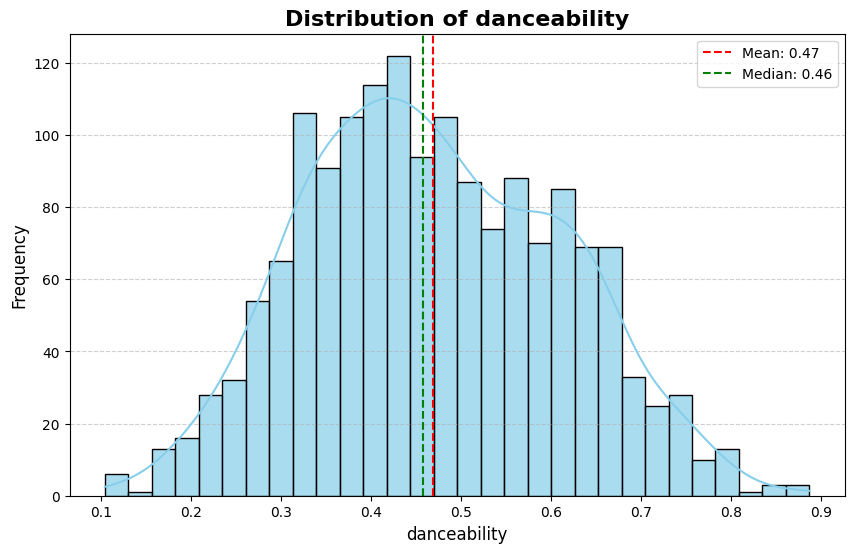

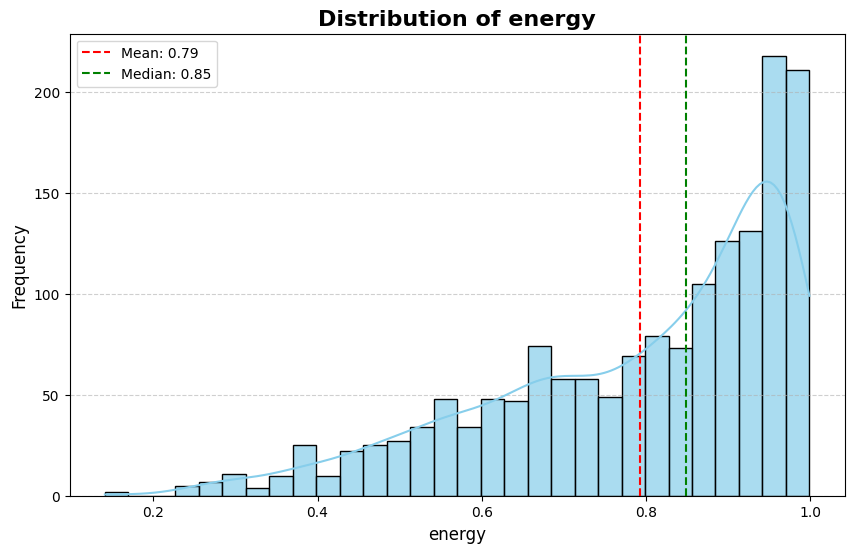

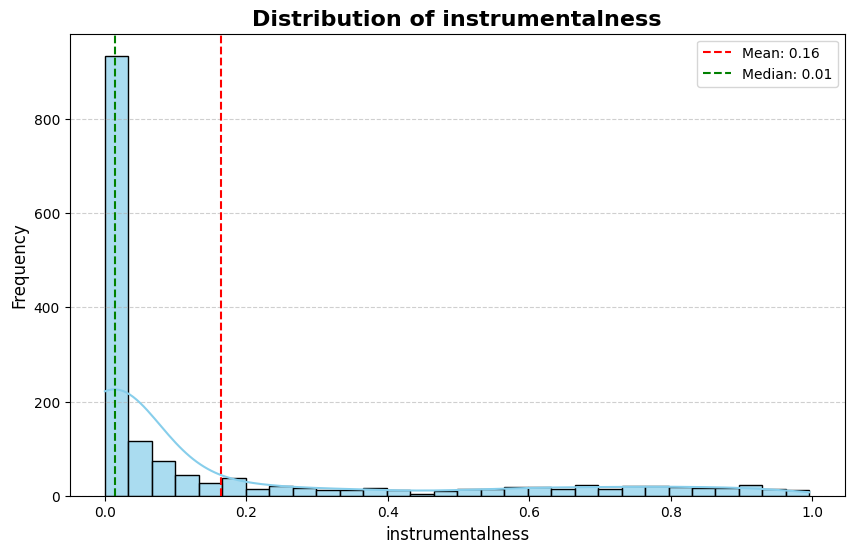

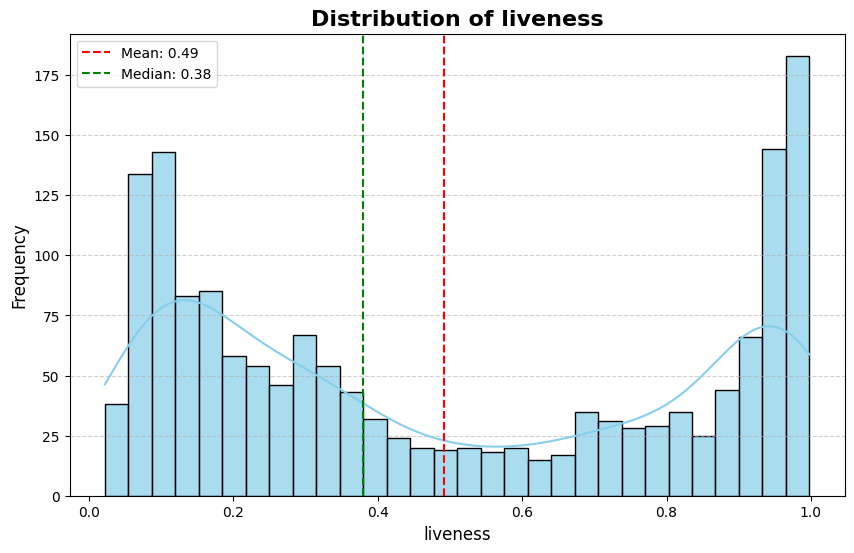

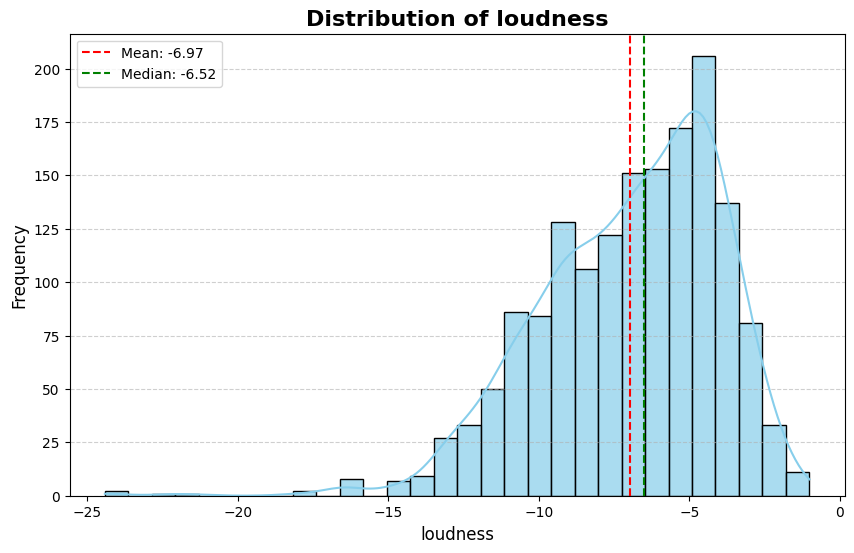

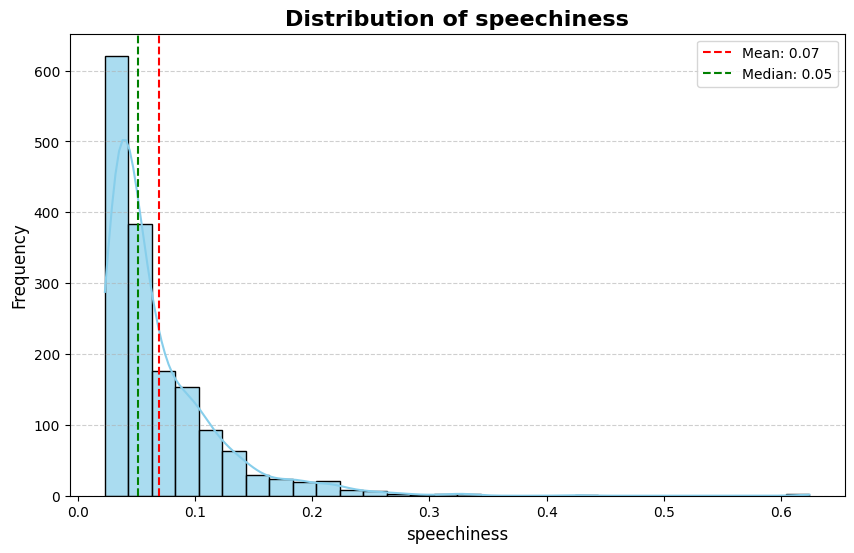

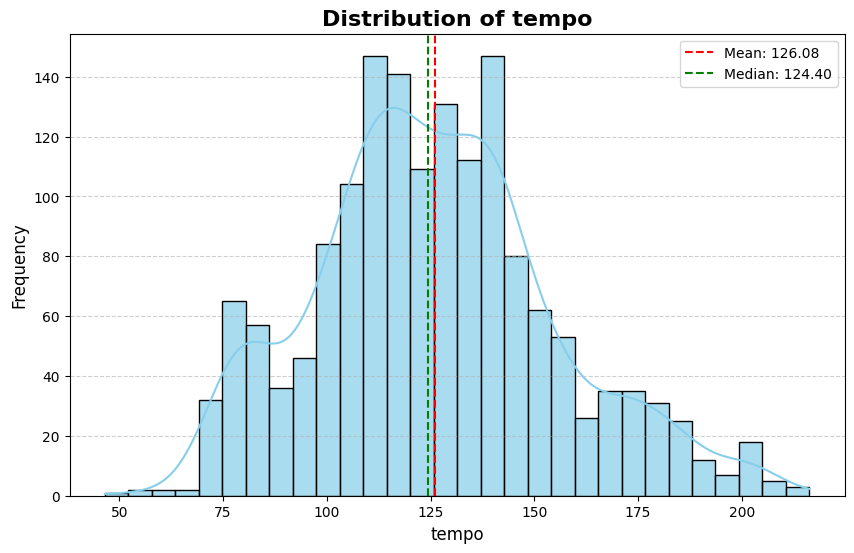

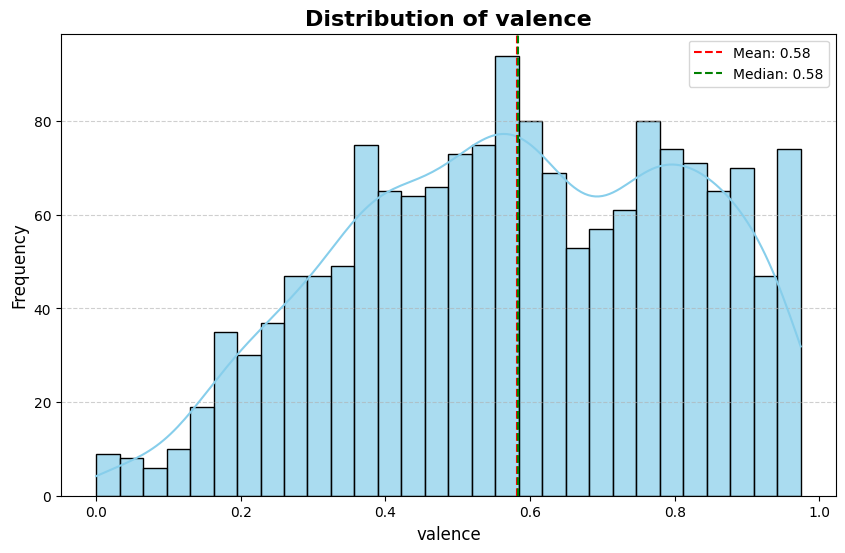

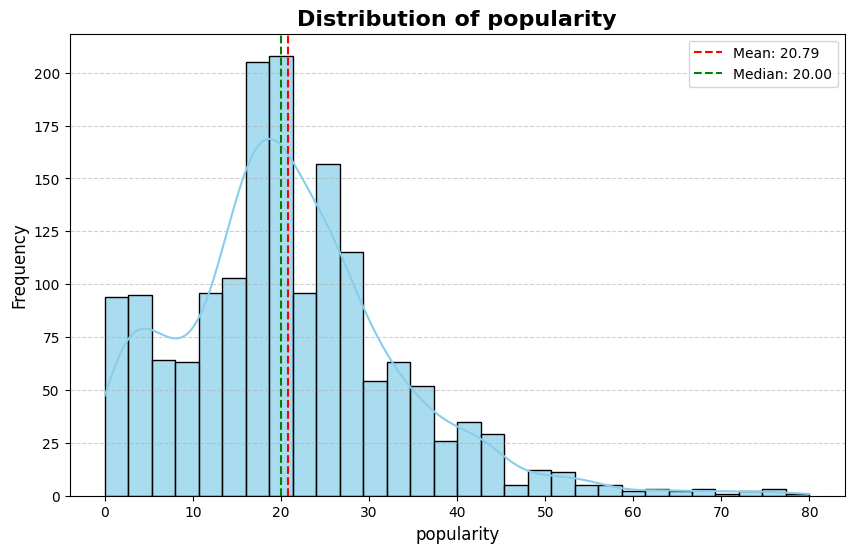

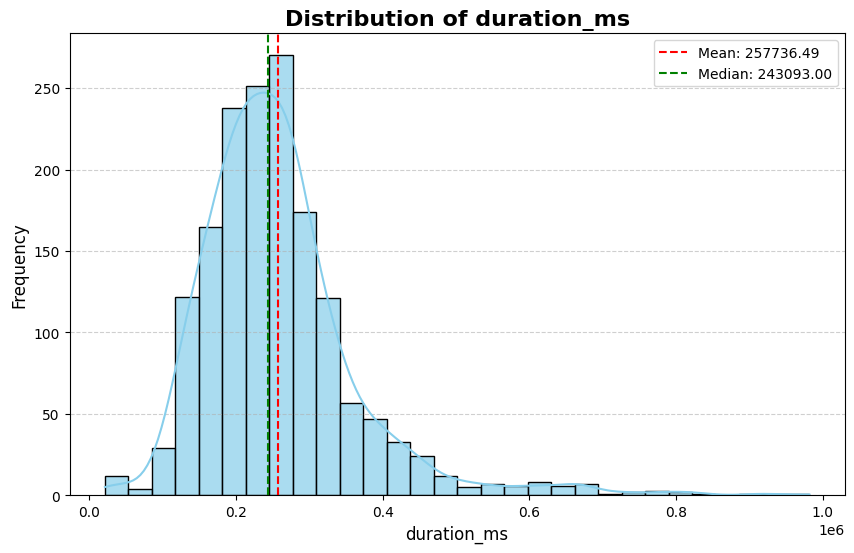

In [17]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset[feature], kde=True, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of {feature}", fontsize=16, weight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.axvline(dataset[feature].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {dataset[feature].mean():.2f}")
    plt.axvline(dataset[feature].median(), color='green', linestyle='dashed', linewidth=1.5, label=f"Median: {dataset[feature].median():.2f}")
    plt.legend()
    plt.show()

>*Checking feature distributions during **EDA** helps us understand the **shape** of the data, spot issues like **outliers** or **skewness**, and decide if **transformations** or **scaling** are needed. It also ensures the data is suitable for the chosen models and improves overall analysis and predictions*

### **Analysis of Pairwise Relationships Among Key Features**

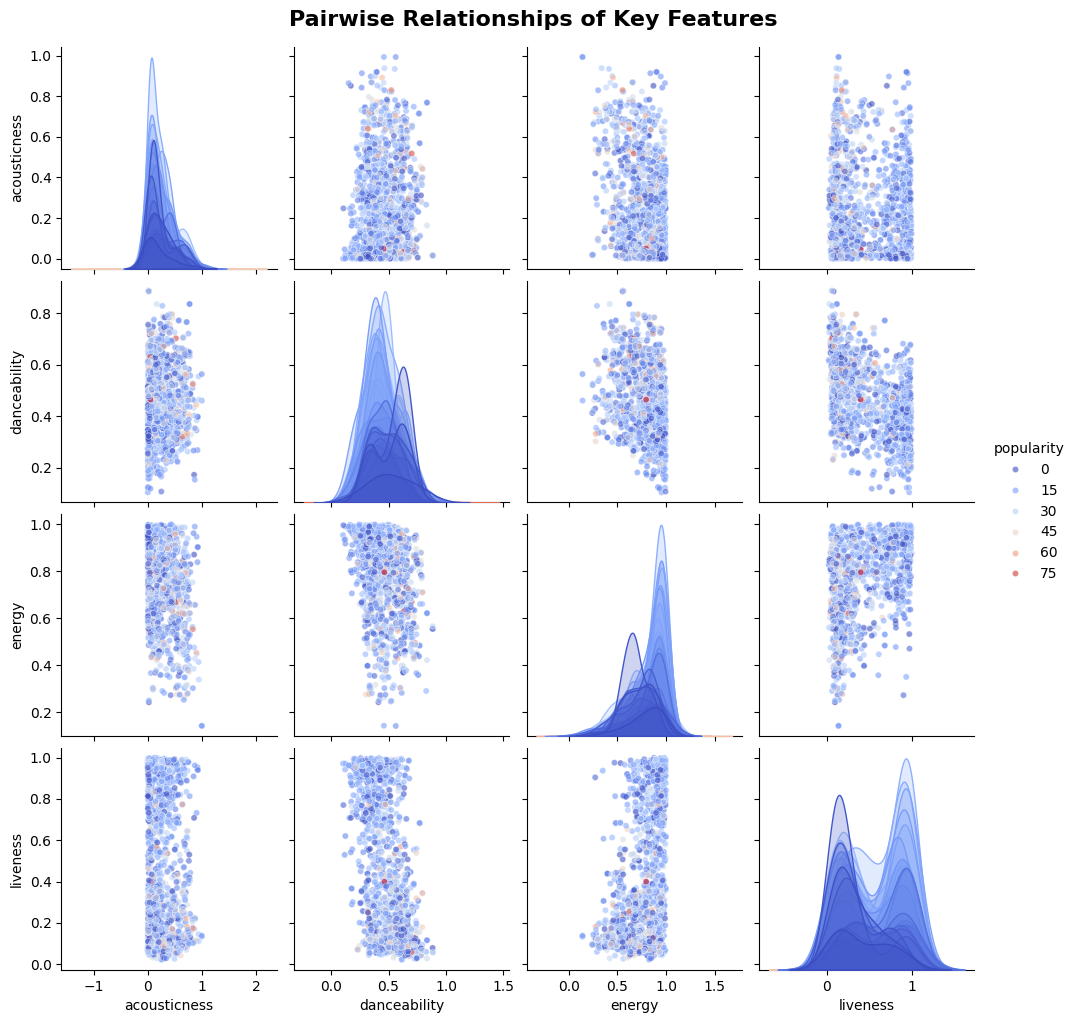

In [18]:
# Select only a few key features
selected_features = ['acousticness', 'danceability', 'energy', 'liveness', 'popularity']

# Create a pairplot with enhancements
pairplot = sns.pairplot(
    dataset[selected_features],
    diag_kind='kde',  # KDE on the diagonal
    hue='popularity',  # Color points by 'popularity' (categorize if needed)
    palette='coolwarm',
    plot_kws={'alpha': 0.6, 's': 20}  # Transparency and point size
)

# Adjust titles and add better aesthetics
pairplot.fig.suptitle("Pairwise Relationships of Key Features", y=1.02, fontsize=16, weight='bold')
plt.show()

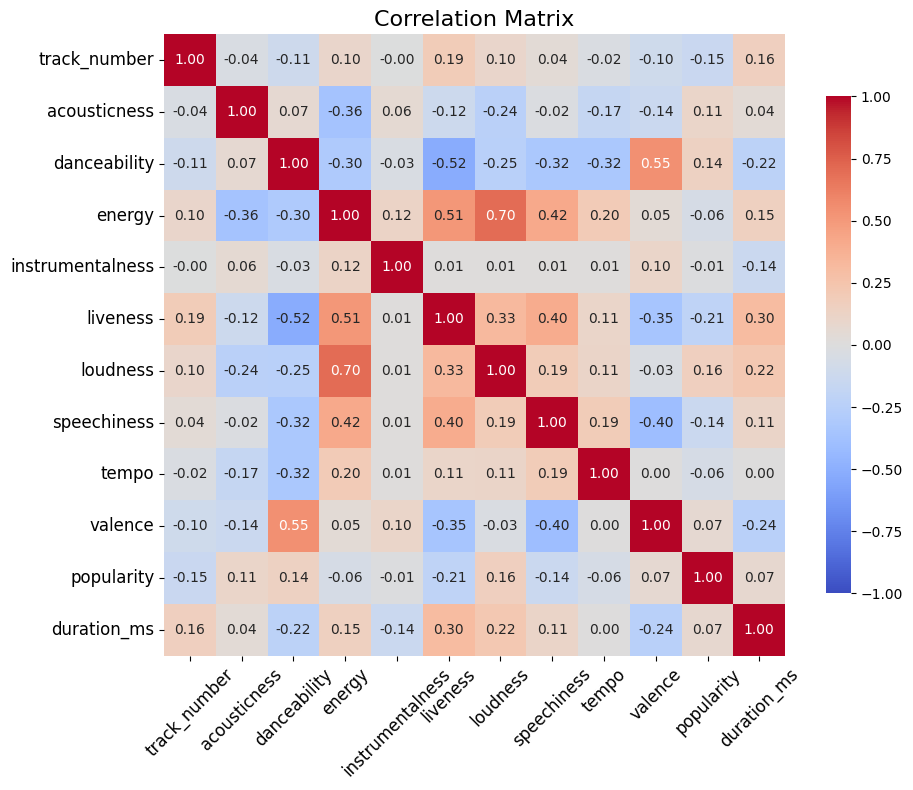

In [19]:
# Calculate the correlation matrix
correlation_matrix = dataset.select_dtypes(include=np.number).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Use a diverging colormap for better visualization
sns.heatmap(
    correlation_matrix,
    annot=True,       # Show correlation values
    fmt=".2f",        # Format values to 2 decimal places
    cmap="coolwarm",  # Diverging colormap
    vmin=-1, vmax=1,  # Ensure consistent range
    cbar_kws={'shrink': 0.8},  # Shrink colorbar for aesthetics
    square=True       # Make heatmap squares
)

# Add titles and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### **Popularity Analysis**

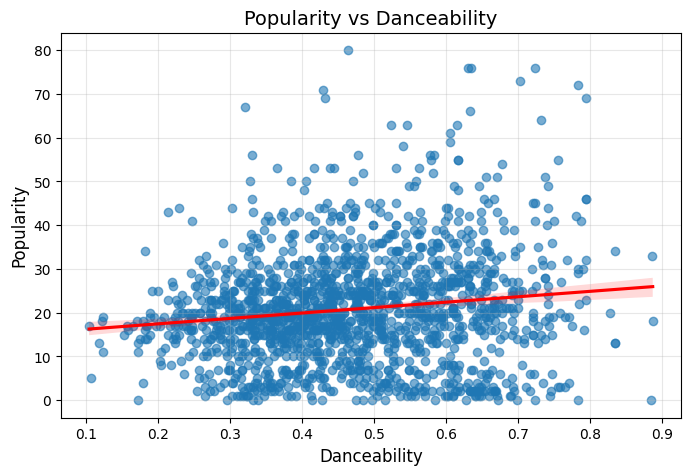

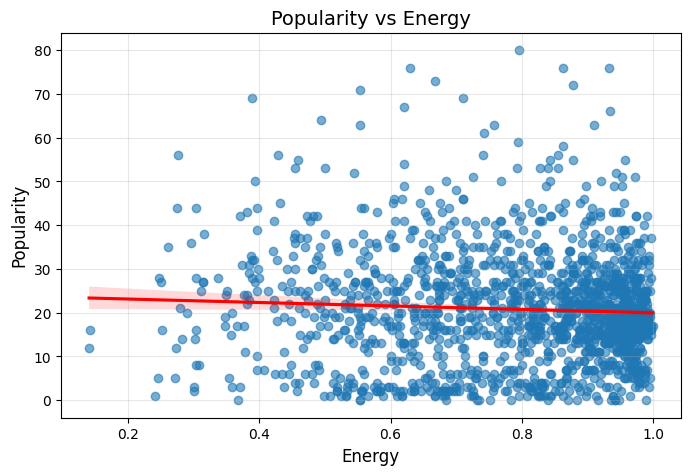

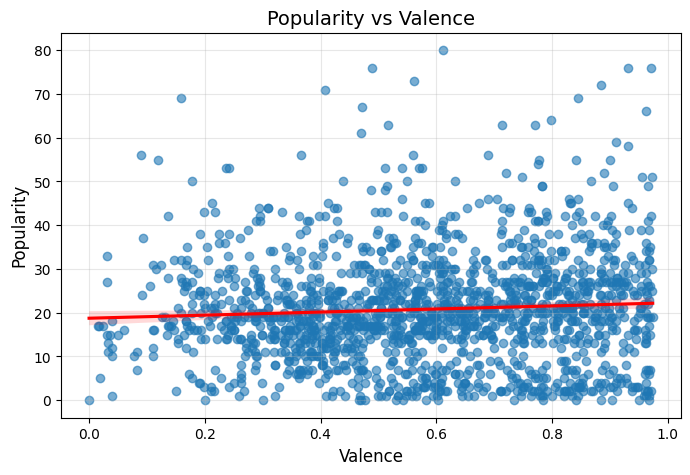

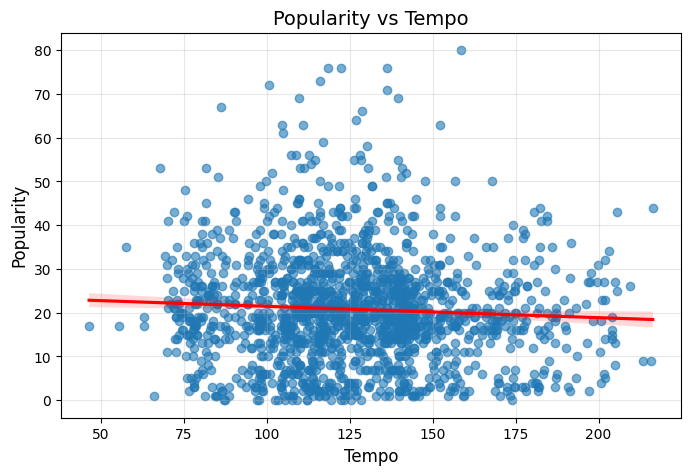

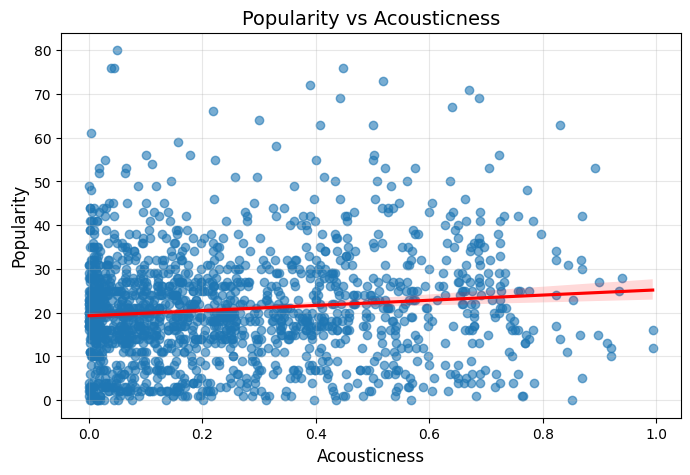

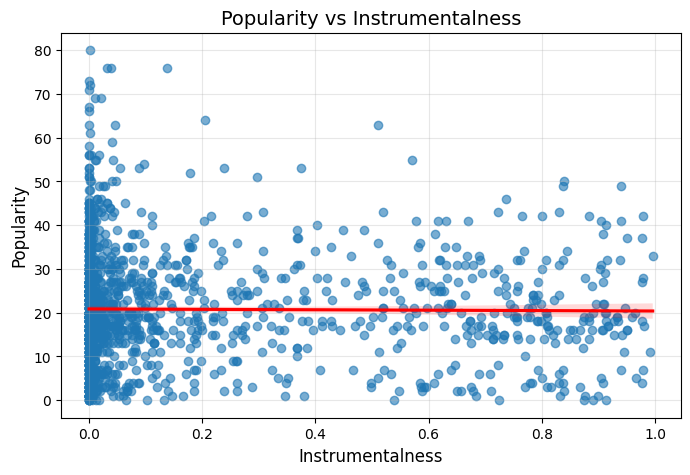

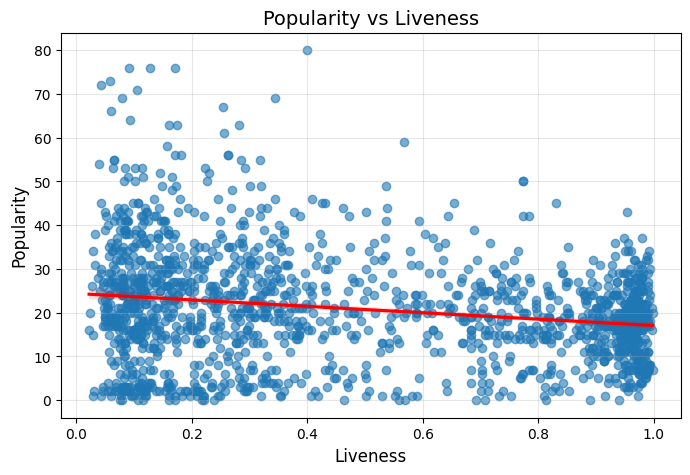

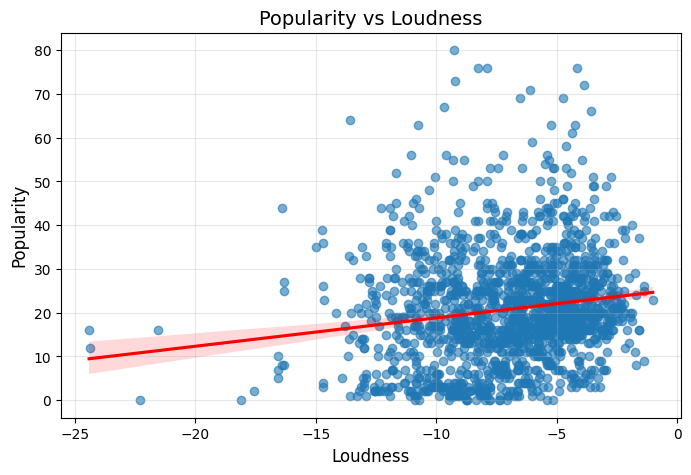

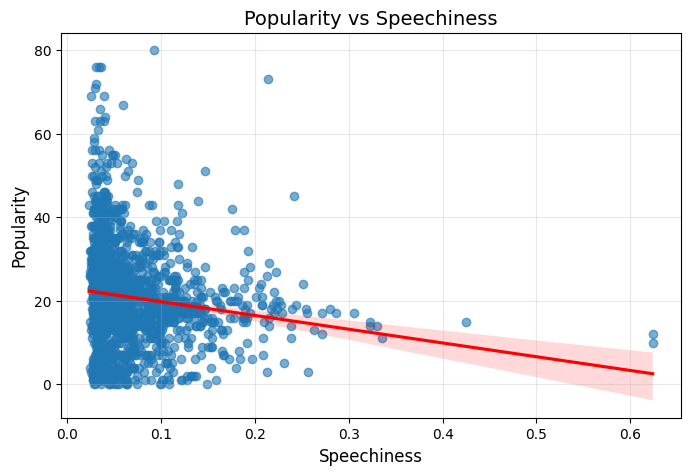

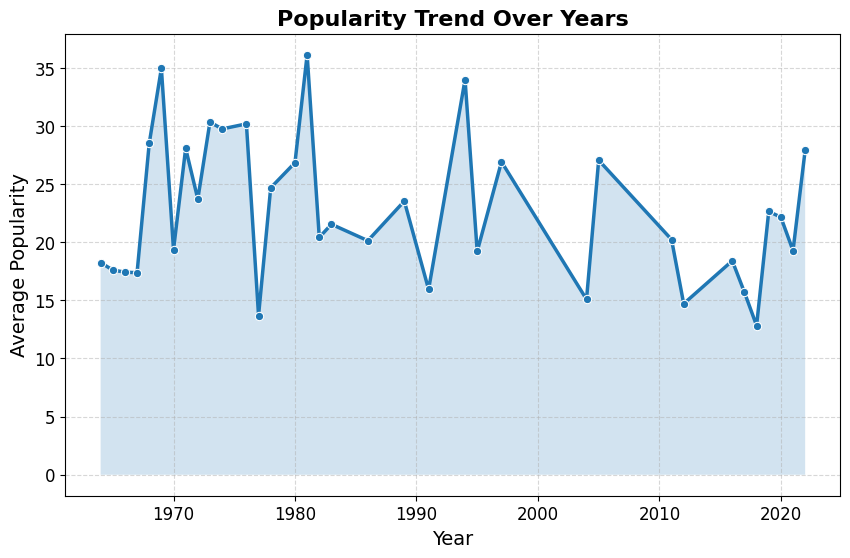

In [20]:
dataset['release_year'] = pd.to_datetime(dataset['release_date']).dt.year

# Scatter plots with regression lines
for column in ['danceability', 'energy', 'valence', 'tempo', 'acousticness','instrumentalness', 'liveness', 'loudness', 'speechiness']:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=dataset[column], y=dataset['popularity'], scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
    plt.title(f"Popularity vs {column.capitalize()}", fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel("Popularity", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

# Improved popularity over time
yearly_popularity = dataset.groupby('release_year')['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_popularity, x='release_year', y='popularity', marker='o', linewidth=2.5)
plt.fill_between(yearly_popularity['release_year'], yearly_popularity['popularity'], alpha=0.2)
plt.title("Popularity Trend Over Years", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Popularity", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Dimensionality reduction**

In [21]:
# Standardize features
features = ['acousticness', 'danceability', 'energy', 'tempo', 'valence', 'speechiness', 'instrumentalness']
X = dataset[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

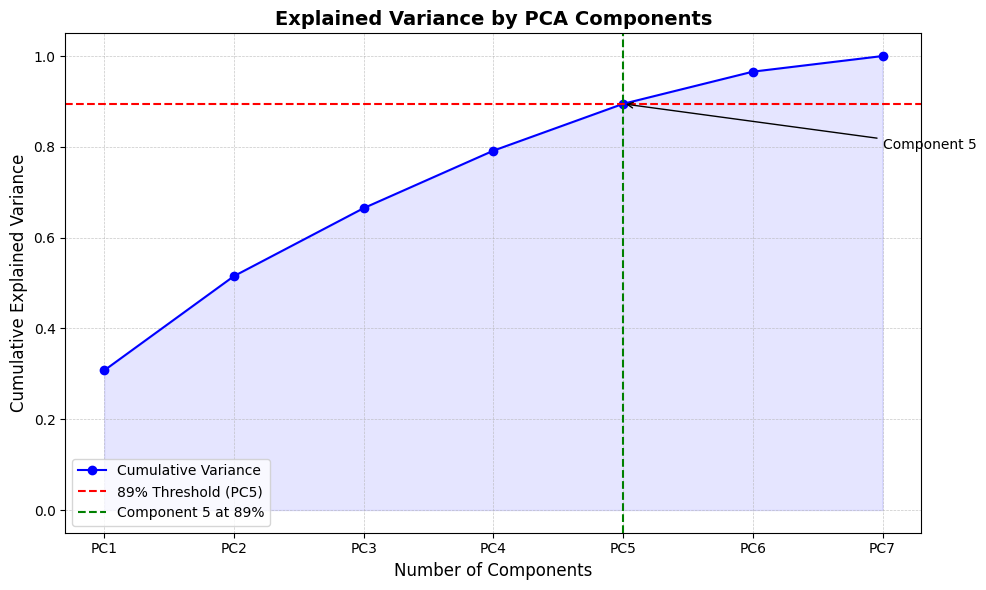

In [22]:
# Explained variance and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Adjust threshold to PC5
threshold_component = 5  # Explicitly using PC5
threshold_value = cumulative_variance[threshold_component - 1]  # Corresponding cumulative variance

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='blue', label='Cumulative Variance')
plt.axhline(y=threshold_value, color='red', linestyle='--', label=f'{int(threshold_value * 100)}% Threshold (PC5)')
plt.axvline(x=threshold_component - 1, color='green', linestyle='--', 
            label=f'Component {threshold_component} at {int(threshold_value * 100)}%')
plt.fill_between(range(len(cumulative_variance)), 0, cumulative_variance, color='blue', alpha=0.1)

# Annotations
plt.annotate(f'Component {threshold_component}',
             xy=(threshold_component - 1, cumulative_variance[threshold_component - 1]),
             xytext=(threshold_component + 1, cumulative_variance[threshold_component - 1] - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

# Titles and labels
plt.title("Explained Variance by PCA Components", fontsize=14, fontweight='bold')
plt.xlabel("Number of Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.xticks(range(len(cumulative_variance)), labels=[f'PC{i+1}' for i in range(len(cumulative_variance))])
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

plt.show()

>*From this I'll get to know that **4** components is enough*

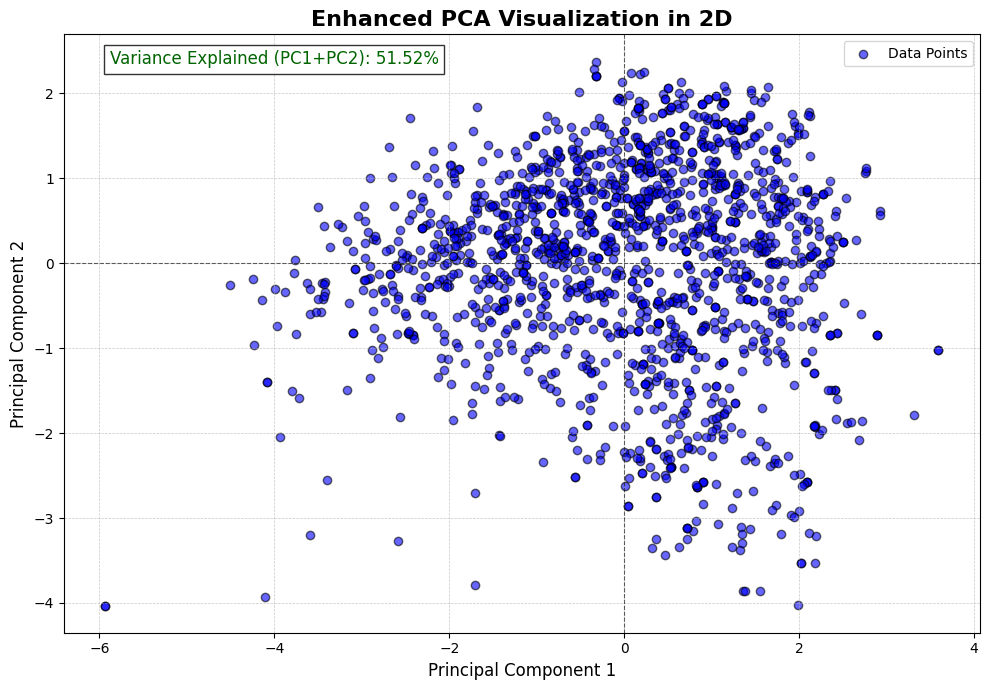

((1610, 4), array([0.30749642, 0.20768205, 0.14977201, 0.12660995]))

In [23]:
# Reduce to 4 components for clustering visualization
pca = PCA(n_components=4)
X_pca_2d = pca.fit_transform(X_scaled)

# Print details about the reduced dataset
reduced_shape = X_pca_2d.shape
variance_explained = pca.explained_variance_ratio_

# Enhanced 2D visualization with improvements
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6, c='blue', edgecolor='k', label='Data Points')

# Adding grid, labels, and enhancements
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)  # Horizontal axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)  # Vertical axis

# Highlight specific clusters or ranges (optional)
# Add your own clustering labels or separation lines if needed

# Titles and labels
plt.title("Enhanced PCA Visualization in 2D", fontsize=16, fontweight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Add annotation for explained variance
explained_variance_2d = sum(variance_explained[:2]) * 100
plt.text(0.05, 0.95, f"Variance Explained (PC1+PC2): {explained_variance_2d:.2f}%",
         fontsize=12, transform=plt.gca().transAxes, color='darkgreen', bbox=dict(facecolor='white', alpha=0.8))

# Add legend
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()

plt.show()

# Output the shape of reduced dataset and explained variance
reduced_shape, variance_explained

### **Perform cluster analysis**

In [24]:
# Elbow Method
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca_2d)
    wss.append(kmeans.inertia_)

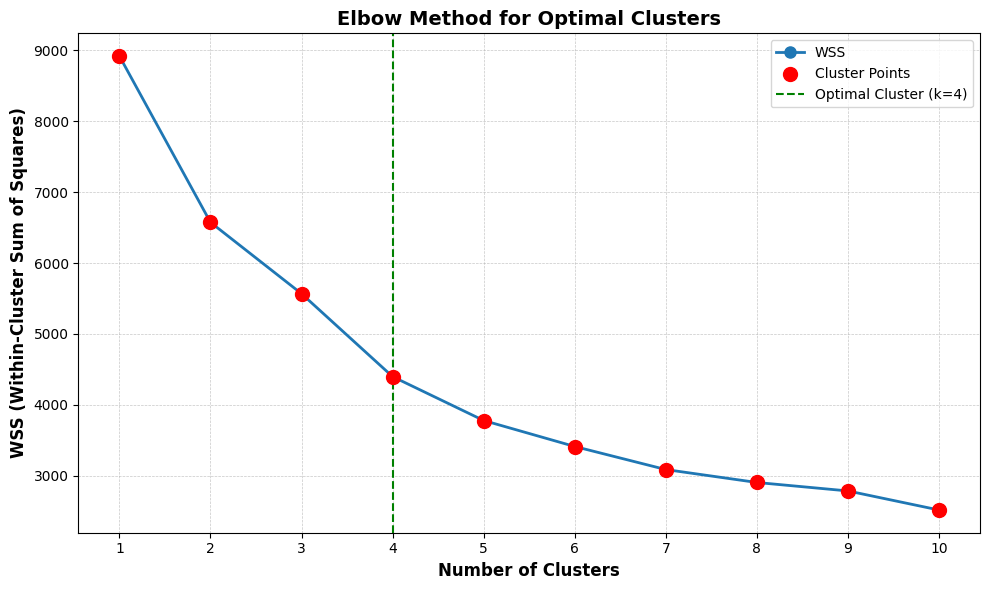

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wss, marker='o', linestyle='-', linewidth=2, markersize=8, label='WSS')
plt.scatter(range(1, 11), wss, color='red', s=100, zorder=5, label='Cluster Points')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters", fontsize=12, weight='bold')
plt.ylabel("WSS (Within-Cluster Sum of Squares)", fontsize=12, weight='bold')
plt.title("Elbow Method for Optimal Clusters", fontsize=14, weight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axvline(x=4, color='green', linestyle='--', linewidth=1.5, label='Optimal Cluster (k=4)')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [26]:
# Silhouette Score
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca_2d)
    silhouette_avg = silhouette_score(X_pca_2d, cluster_labels)
    print(f"For {n_clusters} clusters, the silhouette score is {silhouette_avg}")

For 2 clusters, the silhouette score is 0.25657407921316594
For 3 clusters, the silhouette score is 0.26226739306392266
For 4 clusters, the silhouette score is 0.27272279302653607
For 5 clusters, the silhouette score is 0.2816945436784109
For 6 clusters, the silhouette score is 0.2876143118534433
For 7 clusters, the silhouette score is 0.26493256433872947


### **Clustering**

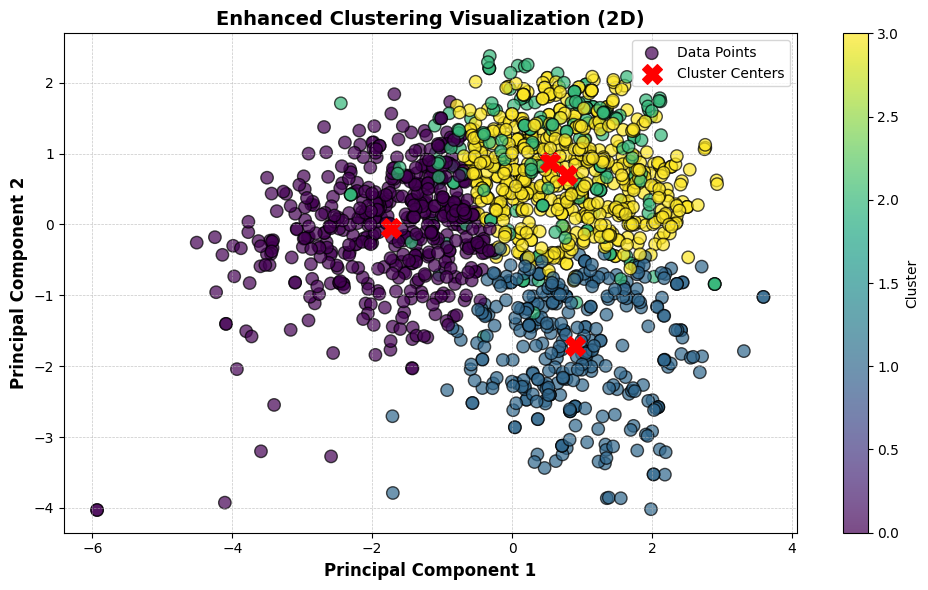

In [27]:
# Perform K-Means clustering
optimal_clusters = 4 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_pca_2d)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca_2d[:, 0], 
    X_pca_2d[:, 1], 
    c=dataset['Cluster'], 
    cmap='viridis', 
    alpha=0.7, 
    edgecolor='k', 
    s=80, 
    label='Data Points'
)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], 
    centers[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    label='Cluster Centers'
)
plt.xlabel("Principal Component 1", fontsize=12, weight='bold')
plt.ylabel("Principal Component 2", fontsize=12, weight='bold')
plt.title("Enhanced Clustering Visualization (2D)", fontsize=14, weight='bold')
plt.colorbar(scatter, label="Cluster", orientation='vertical')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

### **Defining each cluster based on the features**

In [28]:
# Analyze cluster characteristics
cluster_means = dataset.groupby('Cluster')[features].mean()
print("Cluster Characteristics:\n", cluster_means)

Cluster Characteristics:
          acousticness  danceability    energy       tempo   valence  \
Cluster                                                               
0            0.170915      0.341773  0.914510  143.286297  0.415027   
1            0.505116      0.475587  0.572812  109.971167  0.431361   
2            0.273647      0.520089  0.830931  123.477144  0.753901   
3            0.166418      0.556170  0.798551  121.364200  0.751114   

         speechiness  instrumentalness  
Cluster                                 
0           0.113808          0.132278  
1           0.046446          0.067884  
2           0.053841          0.727059  
3           0.050055          0.050326  


##### 1. Cluster 0 is of High-Energy Non-Danceable Tracks
##### 2. Cluster 1 is of Acoustic and Mellow Tracks
##### 3. Cluster 2 is of Instrumental Happy Dance Tracks
##### 4. Cluster 3 is of Vocal Happy Dance Tracks

In [29]:
# Assign labels to clusters
cluster_labels = {
    0: "High-Energy Non-Danceable Tracks",
    1: "Acoustic and Mellow Tracks",
    2: "Instrumental Happy Dance Tracks",
    3: "Vocal Happy Dance Tracks"
}

# Add labels to your dataset
dataset['Cluster_Label'] = dataset['Cluster'].map(cluster_labels)

### **Recommendation for songs**

In [30]:
# Example: Recommend songs from Cluster 3
recommended_songs = dataset[dataset['Cluster_Label'] == "Vocal Happy Dance Tracks"]
print("Recommended Songs:\n", recommended_songs[['name', 'Cluster_Label']].head())

Recommended Songs:
                                               name             Cluster_Label
15               Can't You Hear Me Knocking - Live  Vocal Happy Dance Tracks
23  Honky Tonk Women - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
25      Hand Of Fate - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
26          Route 66 - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
28        Crazy Mama - Live At The El Mocambo 1977  Vocal Happy Dance Tracks
